Name: Norhan Swar
ID: 231000486

# <center><font color=blue>Fuzzy C means Clustering </font>

<font size=4>Use the data provided in the file “clustering_assignmentData.csv” where we know that there are three clusters from the labels (K = 3). Apply Fuzzy C-means algorithm on the data provied where each row in the file corresponds to one data point. <br> <br>

Important Notes:  <br>One important aspect of fuzzy c means that changes the results significantly is the initialization. So you should run the fuzzy c-means algorithm with the given initialization below above 100 times. The final output of the clustering is the result that gives the minimum  J.
One possible startegy for intialization cluster centers is to select the furthest points from each other. 
it's required to try clustering with different q (the fuzziness Index and visualize the results)
</font>


<font color=blue size=4>1-Needed Packages

In [9]:
import numpy as np
import matplotlib.pylab as plt
import math
import pandas as pd
from numpy.random import seed
import sys
ep = sys.float_info.epsilon

<font color=blue size=4>2-Load Data

In [22]:
import numpy as np

def Random_Select(data, k=3):
    """
    Selects k random data points as initial centroids for fuzzy c-means clustering.

    Args:
        data (np.ndarray): The dataset as a NumPy array.
        k (int): The number of centroids to select (default is 3).

    Returns:
        tuple: A tuple containing the k selected centroids as individual NumPy arrays.
    """

    idx = np.random.choice(data.shape[0], k, replace=False)  # Choose random indices
    centroids = data[idx, :]  # Select corresponding rows

    # Extract individual centroids as NumPy arrays
    m1, m2, m3 = centroids[0], centroids[1], centroids[2]
    return m1, m2, m3


In [37]:
import numpy as np

def Membership(data, m1, m2, m3, q):
    """
    This function implements step 2 in slide 15, Lec 6 for fuzzy mean clustering.

    Args:
      data: A NumPy array representing the dataset.
      m1, m2, m3: The current cluster centers.
      q: The fuzziness index.

    Returns:
      rnk: A new membership matrix with shape (len(data), 3).
    """

    num_points = len(data)

    # Calculate distances between each data point and the cluster centers
    distances = np.linalg.norm(data[:, np.newaxis] - np.vstack([m1, m2, m3]), axis=2)

    # Add a small epsilon to avoid division by zero or infinite values
    epsilon = 1e-9
    distances += epsilon

    # Calculate the membership values using the formula for rnk
    rnk = 1 / (distances ** 2 / (q - 1))

    # Normalize the membership values along each row
    rnk /= np.sum(rnk, axis=1)[:, np.newaxis]

    # Assert the correct shape of the membership matrix
    assert rnk.shape == (num_points, 3)

    return rnk


In [38]:
import numpy as np

def Update_Means(data, rnk, q):
    """
    Updates the cluster centroids in fuzzy c-means clustering.

    Args:
        data (np.ndarray): The dataset as a 2D array of shape (num_samples, num_features).
        rnk (np.ndarray): The membership matrix of shape (num_samples, num_means).
        q (float): The fuzziness index.

    Returns:
        np.ndarray: The updated cluster centroids of shape (num_means, num_features).
    """

    num_samples, num_features = data.shape
    num_means = rnk.shape[1]

    means = np.zeros((num_means, num_features))  # Initialize new centroids

    rnk_q = rnk ** q  # Calculate weighted membership matrix

    for j in range(num_means):
        # Calculate denominator for weighted mean
        denominator = np.sum(rnk_q[:, j], axis=0)

        # Calculate weighted mean for each feature
        for i in range(num_features):
            means[j, i] = np.sum(rnk_q[:, j] * data[:, i], axis=0) / denominator

    return means



In [48]:
import numpy as np
def Objective_Function(data, rnk, m1, m2, m3, q):
    """
    This function implements the objective function for fuzzy mean clustering
    as described in slide 13, Lec 6.

    Args:
       data: A NumPy array representing the dataset.
       rnk: The membership matrix.
       m1, m2, m3: The cluster centers.
       q: The fuzziness index.

    Returns:
       Avgdist: The total average distance.
    """

    num_points, num_dims = data.shape

    # Calculate the distances between each data point and the cluster centers
    distances = np.linalg.norm(data[:, np.newaxis] - np.vstack([m1, m2, m3]), axis=2)

    # Calculate the weighted distances using the membership values
    weighted_distances = rnk ** q * distances

    # Sum the weighted distances for each cluster
    sum_dist1 = np.sum(weighted_distances[:, 0])
    sum_dist2 = np.sum(weighted_distances[:, 1])
    sum_dist3 = np.sum(weighted_distances[:, 2])

    # Calculate the total average distance
    Avgdist = (sum_dist1 + sum_dist2 + sum_dist3) / num_points

    return Avgdist

In [43]:
import numpy as np

def Stopping_Criteria(m1_b, m2_b, m3_b, m1, m2, m3):
    """
    This function tests for convergence in fuzzy mean clustering.

    Args:
       m1_b, m2_b, m3_b: The cluster centers before updating.
       m1, m2, m3: The cluster centers after updating.

    Returns:
       True if the algorithm has converged, False otherwise.
    """

    # Calculate the maximum difference between old and new means for each cluster
    max_diff1 = np.max(np.abs(m1_b - m1))
    max_diff2 = np.max(np.abs(m2_b - m2))
    max_diff3 = np.max(np.abs(m3_b - m3))

    # Set a threshold for convergence
    threshold = 1e-4  # Adjust as needed

    # Check if all differences are below the threshold
    if max_diff1 <= threshold and max_diff2 <= threshold and max_diff3 <= threshold:
        return True
    else:
        return False


In [49]:
#________________________Main Code Statrs here___________________________________
def myFCM(data, q):
        assert q > 1
        m1f,m2f,m3f=np.zeros((2,100)),np.zeros((2,100)),np.zeros((2,100)) # 3 - Means 

        Avgdist=np.zeros((100,))
        counter=0

        while(counter <100):
            
                # --------------------Intialization Step 1------------------------------#
                seed(counter)
                m1,m2,m3 = Random_Select(data)

                rnk = np.zeros(len(data)) # Membership Vector

                m1_b = m1
                m2_b = m2
                m3_b = m3
                cc = 0
                while(True):
                    #---------------Step 2 compute rnk-----------------------------------------#

                    rnk = Membership(data,m1,m2,m3, q)
                        
                    assert all(np.round(np.sum(rnk, axis = 1), 2) == np.ones(len(rnk)))

                    #---------------Step 3 update means-----------------------------------------#

                    m1,m2,m3 = Update_Means(data,rnk, q)

                    #---------------Step 4 Test Convergence -----------------------------------------#

                    if Stopping_Criteria(m1_b,m2_b,m3_b,m1,m2,m3):
                         m1f[:,counter],m2f[:,counter],m3f[:,counter] = m1,m2,m3

                         Avgdist[counter] = Objective_Function(data,rnk,m1,m2,m3, q)
                         break


                    m1_b = m1
                    m2_b = m2
                    m3_b = m3

                counter += 1     

        idx = np.argmin(Avgdist)
        m1_ = m1f[:,idx]
        m2_ = m2f[:,idx]
        m3_ = m3f[:,idx]
        rnk_=np.argmax(Membership(data,m1_,m2_,m3_, q), axis = 1)
        return rnk_, m1_, m2_, m3_

In [50]:
# Load Data
df = pd.read_csv('clustering_assignmentData.csv')
data = df[['X1', 'X2']].values
y = df['y'].values

In [58]:
data

array([[-3.37561542,  3.63236314],
       [-3.61882807,  3.78627892],
       [-3.48552993,  0.46412084],
       ...,
       [ 1.17962827, -1.54262502],
       [-0.49738132,  0.78227797],
       [ 1.13089877, -1.13033403]])

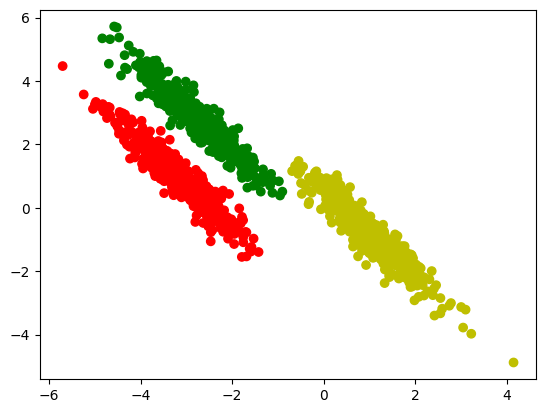

In [51]:
plt.scatter(data[:, 0],data[:, 1], color = list(map(lambda x: {0:'r', 1: 'g', 2: 'y'}.get(x), y)))

# Plotting 

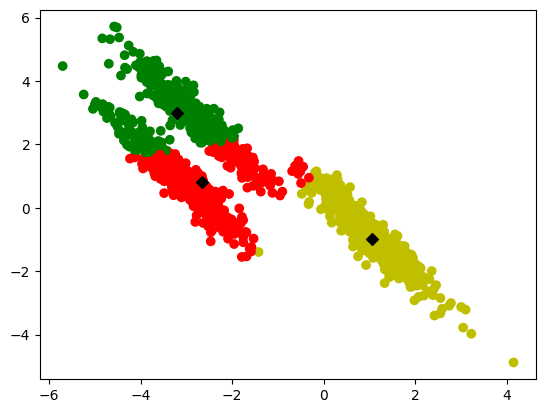

In [52]:
# Plotting the Final Centroids and data. 
q  =2
rnk_ , m1_, m2_, m3_= myFCM(data, q)
plt.scatter(data[:, 0],data[:, 1], color = list(map(lambda x: {0:'r', 1: 'g', 2: 'y'}.get(x), rnk_)))
plt.scatter([m1_[0], m2_[0],m3_[0]],[m1_[1], m2_[1], m3_[1]], marker = 'D', c = 'black')


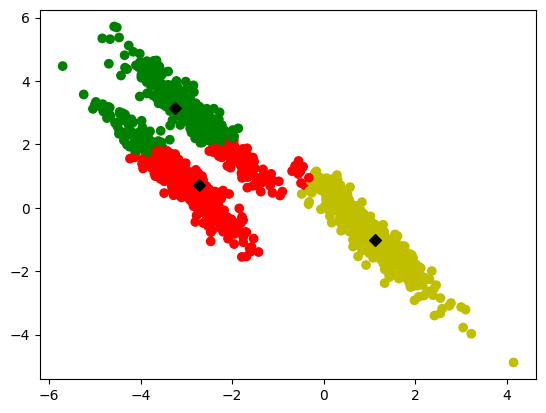

In [53]:
q = 3
rnk_ , m1_, m2_, m3_= myFCM(data, q)

plt.scatter(data[:, 0],data[:, 1], color = list(map(lambda x: {0:'r', 1: 'g', 2: 'y'}.get(x), rnk_)))
plt.scatter([m1_[0], m2_[0],m3_[0]],[m1_[1], m2_[1], m3_[1]], marker = 'D', c = 'black')

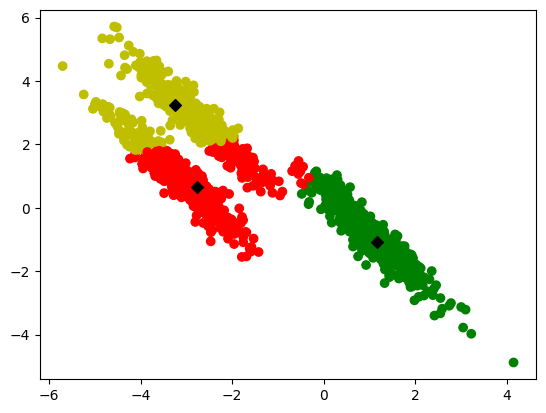

In [54]:
q = 4
rnk_ , m1_, m2_, m3_= myFCM(data, q)

plt.scatter(data[:, 0],data[:, 1], color = list(map(lambda x: {0:'r', 1: 'g', 2: 'y'}.get(x), rnk_)))
plt.scatter([m1_[0], m2_[0],m3_[0]],[m1_[1], m2_[1], m3_[1]], marker = 'D', c = 'black')

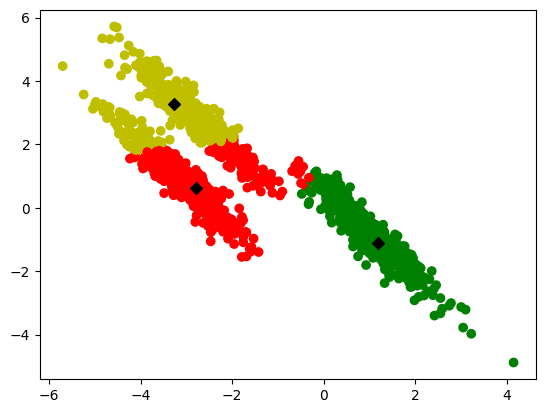

In [55]:
q = 5
rnk_ , m1_, m2_, m3_= myFCM(data, q)

plt.scatter(data[:, 0],data[:, 1], color = list(map(lambda x: {0:'r', 1: 'g', 2: 'y'}.get(x), rnk_)))
plt.scatter([m1_[0], m2_[0],m3_[0]],[m1_[1], m2_[1], m3_[1]], marker = 'D', c = 'black')